                                                             LEVEL 3 -[ TASK 1]

In [3]:
#Importing Liabraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Fetching CSV file

df = pd.read_csv("Dataset.csv")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [7]:
df['Name_Length'] = df['Restaurant Name'].str.len()
df['Address_Length'] = df['Address'].str.len()


In [8]:
df['Has_Table_Booking_Flag'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has_Online_Delivery_Flag'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


In [9]:
df[['Has_Table_Booking_Flag','Has_Online_Delivery_Flag',
    'Name_Length','Address_Length']].head()


,Has_Table_Booking_Flag,Has_Online_Delivery_Flag,Name_Length,Address_Length
0,1,0,16,71
1,1,0,16,67
2,1,0,22,56
3,0,0,4,70
4,1,0,11,64


In [11]:
features = [
    'Longitude',
    'Latitude',
    'Price range',
    'Votes',
    'Has_Table_Booking_Flag',
    'Has_Online_Delivery_Flag',
    'Name_Length',
    'Address_Length'
]

X = df[features]
y = df['Aggregate rating']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)


Linear Regression
MAE: 1.0671423252541095
RMSE: 1.285791653245332
R2: 0.27364630490275


In [14]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\nDecision Tree")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2:", r2_score(y_test, y_pred_dt))



Decision Tree
MAE: 0.28199895342752485
RMSE: 0.4375434492889805
R2: 0.9158896736356777


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))



Random Forest
MAE: 0.2020727367870225
RMSE: 0.30620146301049
R2: 0.9588071852670745


                                                             LEVEL 3 -[ TASK 2]

In [18]:
cuisine_df = df.copy()

cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(', ')
cuisine_df = cuisine_df.explode('Cuisines')


In [19]:
popular_cuisines = cuisine_df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

popular_cuisines.head(10)


Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64

In [20]:
avg_rating_cuisine = cuisine_df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

avg_rating_cuisine.head(10)


Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
Bubble Tea    4.400000
D�_ner        4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64

In [21]:
cuisine_analysis = cuisine_df.groupby('Cuisines').agg({
    'Aggregate rating':'mean',
    'Votes':'sum'
}).sort_values(by='Aggregate rating', ascending=False)

cuisine_analysis.head(10)


,Aggregate rating,Votes
Cuisines,,
Sunda,4.900000,5514
B�_rek,4.700000,1305
Taiwanese,4.650000,384
Ramen,4.500000,1259
Dim Sum,4.466667,1755
Hawaiian,4.412500,8012
Bubble Tea,4.400000,659
D�_ner,4.400000,72
Curry,4.400000,2059


                                                             LEVEL 3 -[ TASK 3]

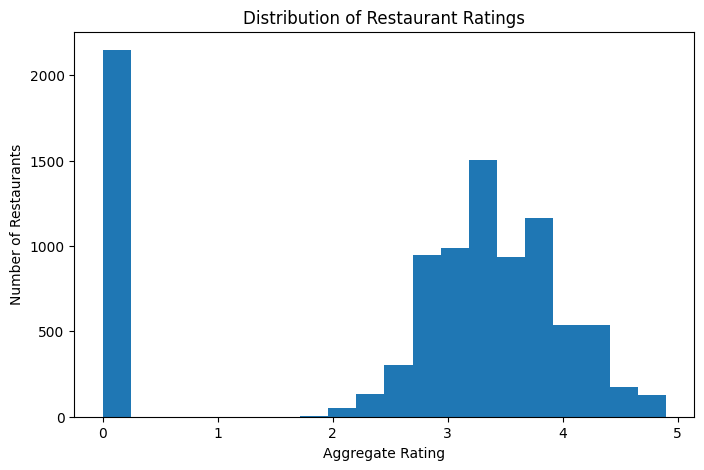

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Aggregate rating'], bins=20)
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Ratings')
plt.show()


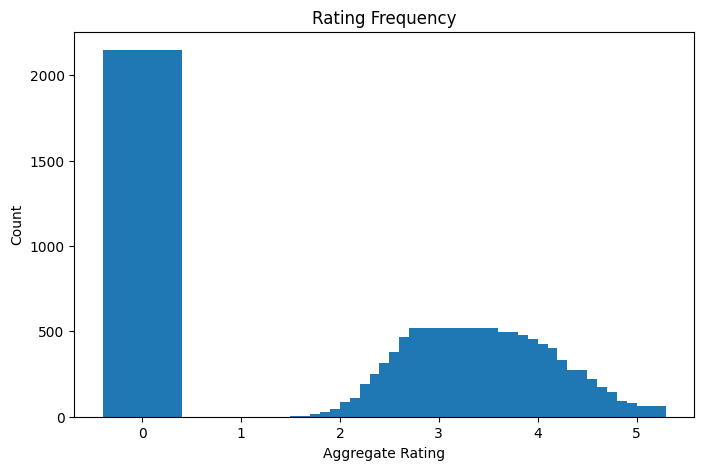

In [23]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.title('Rating Frequency')
plt.show()


In [24]:
cuisine_df = df.copy()
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(', ')
cuisine_df = cuisine_df.explode('Cuisines')


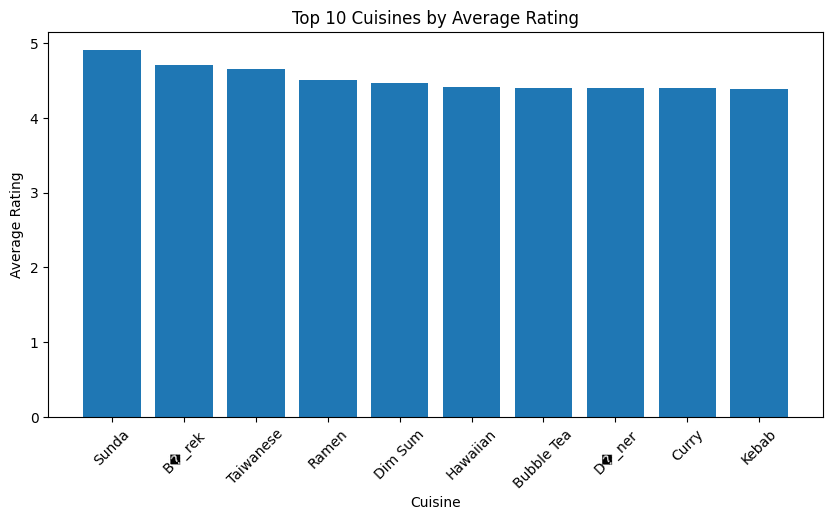

In [25]:
top_cuisines = cuisine_df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_cuisines.index, top_cuisines.values)
plt.xticks(rotation=45)
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Top 10 Cuisines by Average Rating')
plt.show()


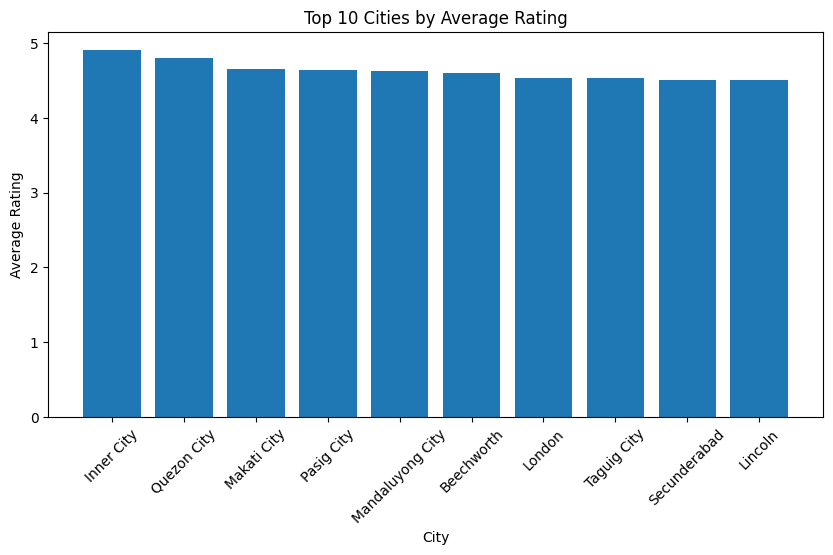

In [26]:
top_cities = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_cities.index, top_cities.values)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Top 10 Cities by Average Rating')
plt.show()


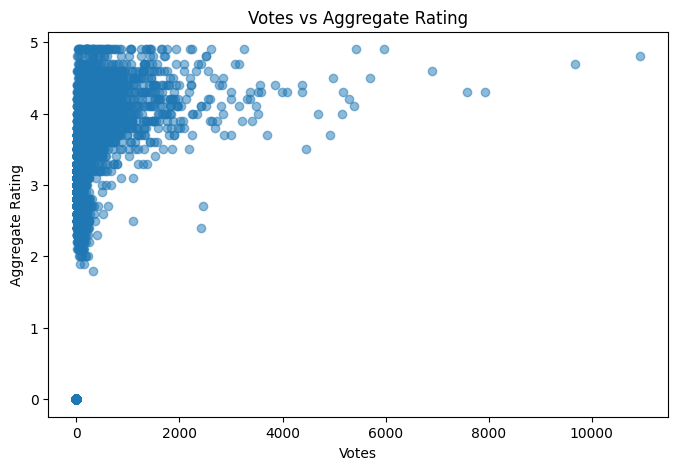

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5)
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.title('Votes vs Aggregate Rating')
plt.show()


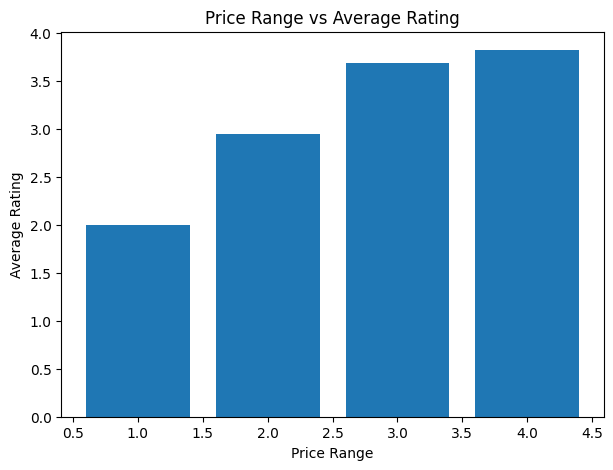

In [28]:
price_rating = df.groupby('Price range')['Aggregate rating'].mean()

plt.figure(figsize=(7,5))
plt.bar(price_rating.index, price_rating.values)
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Price Range vs Average Rating')
plt.show()
